In [1]:
using Printf, FFTW, LinearAlgebra, Plots

In [2]:
include("../modules/operations.jl");

In [3]:
𝑓₍ = 1000
𝑓ₛ = 1.8e9
t₍ = 0:1:1000
L = length(𝑓₍)
t = 0:(1/𝑓ₛ):((L-1)/𝑓ₛ)

0.0:5.555555555555555e-10:0.0

## Complex Number

In [4]:
@show ℜ(exp.(j * 2π * 𝑓₍ * 500));
@show ℑ(exp.(j * 2π * 𝑓₍ * 500));

ℜ(exp.(j * (2π) * 𝑓₍ * 500)) = 1.0
ℑ(exp.(j * (2π) * 𝑓₍ * 500)) = -2.231912181360871e-10


### ULA 

This signal gets received by a uniform linear array (ULA) so that $\mathbf{h} = \mathbf{a}(\theta)$ where the ULA response is of the form

$$
\begin{equation}
\mathbf{a}(\theta) = \begin{bmatrix}
       1 \\
       e^{j2\pi \frac{d}{\lambda} \sin(\theta)} \\[0.3em]
       \vdots \\
       e^{j(m-1)2\pi \frac{d}{\lambda} \sin(\theta)} \\[0.3em]
     \end{bmatrix}
\end{equation}
$$

where $\theta$ is the angle between the direction of arrival (DOA) and the normal to the ULA, $d$ is the spacing between the antennas and $\lambda$ is the wavelength.

In [5]:
# Define the parameters
m = 4
λ = 1.0  # Wavelength (you can set this to any positive number)
d = λ / 2
θ = 30 * (π / 180)  # Convert degrees to radians

0.5235987755982988

In [6]:
# Calculate the vector a(θ)
a₀ = [exp(j * (i-1) * 2π * (d / λ) * sin(θ)) for i in 1:m];

In [7]:
# Print the result
@printf "The vector a(θ) for θ = 30° is: \n"
for i in 1:m
    @printf "%4.2f + %4.2fi\n"  ℜ(a₀[i]) ℑ(a₀[i])
end

The vector a(θ) for θ = 30° is: 
1.00 + 0.00i
0.00 + 1.00i
-1.00 + 0.00i
-0.00 + -1.00i


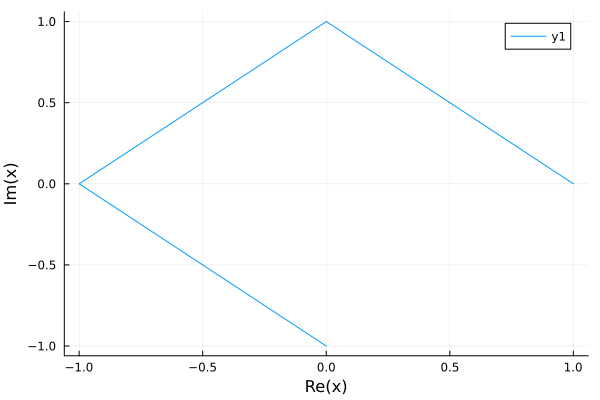

In [8]:
plot(a₀)